<br>

# Building Chatbots in Python

<br>

## Introduction to Conversational Software

* Implementing smalltalk, ELIZA style
* How to use regex and ML to extract meaning from free-form text
* build chat bots to helpdo simple tasks such as query a database
* **statefulness** - How to handle keeping track of the state of a conversation

<br>

### ECHOBOT

we'd like to implement a simple chatbot that just echos a user's input

    def respond( message ):
        return 'I can hear you! you said: {}'.format( message )
    def send_message( message ):
        # calls respond() tp get response

it's weird and unnatural for immediate responses, so it might be better to add a delay

    import time
    time.sleep( 0.5 )
    
<br>

In [1]:
bot_template = "BOT : {0}"
user_template = "USER : {0}"

# Define a function that responds to a user's message: respond
def respond(message):
    # Concatenate the user's message to the end of a standard bot respone
    bot_message = "I can hear you! You said: " + message
    # Return the result
    return bot_message

# Define a function that sends a message to the bot: send_message
def send_message( message ):
    # Print user_template including the user_message
    print(user_template.format(message))
    # Get the bot's response to the message
    response = respond( message )
    # Print the bot template including the bot's response.
    print(bot_template.format(response))

# Send a message to the bot
send_message("hello")

USER : hello
BOT : I can hear you! You said: hello


<br>

### Creating a Personality

Why would you want to add some personnality?  

* personality is one thing that makes a chatbot different from a command line app
* personnality makes chatbots more accessible & engaging to hoomans
* users will expect it!

<br>

smalltalk

    responses = {
        "what's your name?" : ["my name is EchoBot",
                               "they call me Echobot",
                               "the name's Bot, Echo Bot"],
        "what's the weather today?" : "it's {} today".format( weather_today )
    }
    
    weather_today = 'cloudy'
    
    import random
    def respond( message ):
        if message in response:
            return random.choice( responses[ message ] )
            
<br>

In [2]:
# Define variables
name = "Greg"
weather = "cloudy"

# Define a dictionary with the predefined responses
responses = {
  "what's your name?": "my name is {0}".format(name),
  "what's today's weather?": "the weather is {0}".format(weather),
  "default": "default message"
}

# Return the matching response if there is one, default otherwise
def respond( message ):
    # Check if the message is in the responses
    if message in responses:
        # Return the matching message
        bot_message = responses[message]
    else:
        # Return the "default" message
        bot_message = responses["default"]
    return bot_message

respond( "what's your name?" )

'my name is Greg'

In [3]:
print( send_message( "what's today's weather?" ) )
print( send_message( "what's your name?" ) )
send_message( "what's your favorite color?" )

USER : what's today's weather?
BOT : the weather is cloudy
None
USER : what's your name?
BOT : my name is Greg
None
USER : what's your favorite color?
BOT : default message


In [4]:
import random

name = "Gremlin"
weather = "sunny"

# Define a dictionary containing a list of responses for each message
responses = {
  "what's your name?": [
      "my name is {0}".format(name),
      "they call me {0}".format(name),
      "I go by {0}".format(name)
   ],
  "what's today's weather?": [
      "the weather is {0}".format(weather),
      "it's {0} today".format(weather)
    ],
  "default": ["default message"]
}

# Use random.choice() to choose a matching response
def respond(message):
    # Check if the message is in the responses
    if message in responses:
        # Return a random matching response
        bot_message = random.choice(responses[message])
    else:
        # Return a random "default" response
        bot_message = random.choice(responses["default"])
    return bot_message

In [5]:
print( send_message("what's your name?") )
print( send_message("what's your name?") )
print( send_message("what's your name?") )

USER : what's your name?
BOT : my name is Gremlin
None
USER : what's your name?
BOT : I go by Gremlin
None
USER : what's your name?
BOT : I go by Gremlin
None


In [6]:
# Define a dictionary containing a list of responses for each message
responses = {
  "question": [
      "I don't know :(", 'you tell me!'
   ],
  "statement": [
      'tell me more!',
 'why do you think that?',
 'how long have you felt this way?',
 'I find that extremely interesting',
 'can you back that up?',
 'oh wow!',
 ':)'
  ]
}

def respond(message):
    # Check for a question mark
    if message.endswith( '?' ):
        # Return a random question
        return random.choice(responses["question"])
    # Return a random statement
    return random.choice(responses["statement"])


# Send messages ending in a question mark
print( send_message("what's today's weather?") )
print( send_message("what's today's weather?") )

# Send messages which don't end with a question mark
print( send_message("I love building chatbots") )
print( send_message("I love building chatbots") )

USER : what's today's weather?
BOT : you tell me!
None
USER : what's today's weather?
BOT : I don't know :(
None
USER : I love building chatbots
BOT : tell me more!
None
USER : I love building chatbots
BOT : I find that extremely interesting
None


<br>

## Text Processing with Regex

* match messages against known patterns
* extract key phrases
* transform sentences grammatically

<br>

In [7]:
#finding pattern matches
import re
pattern = 'do you remember .*'
message = 'do you remember when you ate strawberries in the garden?'
match = re.search( pattern, message )

if match:
    print( 'string matches')

string matches


In [8]:
#groups
pattern = 'if (.*)'
message = 'what would happen if bots took over the world'
match = re.search( pattern, message )
print( match.group(0) )
print( match.group(1) )

if bots took over the world
bots took over the world


In [9]:
# grammatical transformation
def swap_pronouns( phrase ):
    if 'I' in phrase:
        phrase = re.sub( 'I', 'you', phrase )
    if 'my' in phrase:
        phrase = re.sub( 'my', 'your', phrase )
    return phrase
    
swap_pronouns( 'I walk my dog' )

'you walk your dog'

<br>

putting the two processes together would mean something similar to the following pseudocode:

    pattern = 'do you remember (.*)'
    message = 'do you remember when you ate strawberries in the garden'
    phrase = re.search( pattern, message ).group(1)
    response = choose_response( pattern )
    phrase = swap_pronouns( phrase )
    response.format( phrase )
    
<br>

In [10]:
rules  = {
   'do you think (.*)': ['if {0}? Absolutely.', 'No chance'
   ],
   'do you remember (.*)': ['Did you think I would forget {0}',
 "Why haven't you been able to forget {0}",
 'What about {0}',
 'Yes .. and?'
  ],
   'I want (.*)': ['What would it mean if you got {0}',
 'Why do you want {0}',
 "What's stopping you from getting {0}"  
  ],
   'if (.*)': ["Do you really think it's likely that {0}",
 'Do you wish that {0}',
 'What do you think about {0}',
 'Really--if {0}'    
   ] 
}

# Define match_rule()
def match_rule(rules, message):
    response, phrase = "default", None
    
    # Iterate over the rules dictionary
    for pattern, responses in rules.items():
        # Create a match object
        match = re.search( pattern, message)
        if match is not None:
            # Choose a random response
            response = random.choice( responses )
            if '{0}' in response:
                phrase = match.group(1)
                #print( phrase)
    # Return the response and phrase
    return response.format(phrase), phrase

# Define replace_pronouns()
def replace_pronouns(message):

    message = message.lower()
    if 'me' in message:
        # Replace 'me' with 'you'
        return re.sub( 'me', 'you', message )
    if 'my' in message:
        # Replace 'my' with 'your'
        return re.sub( 'my', 'your', message )
    if 'your' in message:
        # Replace 'your' with 'my'
        return re.sub( 'your', 'my', message )
    if 'you' in message:
        # Replace 'you' with 'me'
        return re.sub( 'you', 'me', message )

    return message

# Define respond()
def respond(message):
    # Call match_rule
    response, phrase = match_rule( rules, message )
    if '{0}' in response:
        # Replace the pronouns in the phrase
        phrase = replace_pronouns( phrase )
        # Include the phrase in the response
        response = response.format( phrase )
    return response


# Test match_rule
print(match_rule(rules, "do you remember your last birthday"))
# Test replace_pronouns()
print(replace_pronouns("my last birthday"))
print(replace_pronouns("when you went to Florida"))
print(replace_pronouns("I had my own castle"))

print( '' )
print( 'Sending messages...')
send_message("do you remember your last birthday")
send_message("do you think humans should be worried about AI")
send_message("I want a robot friend")
send_message("what if you could be anything you wanted")

('What about your last birthday', 'your last birthday')
your last birthday
when me went to florida
i had your own castle

Sending messages...
USER : do you remember your last birthday
BOT : Why haven't you been able to forget your last birthday
USER : do you think humans should be worried about AI
BOT : if humans should be worried about AI? Absolutely.
USER : I want a robot friend
BOT : What would it mean if you got a robot friend
USER : what if you could be anything you wanted
BOT : Do you really think it's likely that you could be anything you wanted


<br>

## Understanding Intents and Entities

**NLU** - Natural Language Understanding is usually concerned with transforming natural text to a structured data format within a particulr domain

<br>

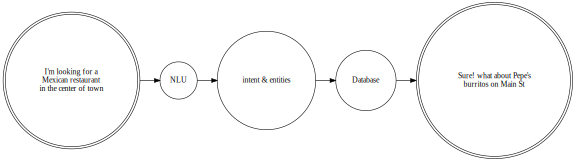

In [24]:
import graphviz

f = graphviz.Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='doublecircle')
f.node("""I'm looking for a 
Mexican restaurant 
in the center of town""")
f.node("""Sure! what about Pepe's
burritos on Main St""")


f.attr('node', shape='circle')
f.edge("""I'm looking for a 
Mexican restaurant 
in the center of town""", 'NLU')
f.edge('NLU', """intent & entities""")
f.edge("""intent & entities""", 'Database')
f.edge('Database', """Sure! what about Pepe's
burritos on Main St""")


f

<br>

**intent** - a broad description of what a person is trying to say  
**entities** - where/ when/ what. specific to your domain  
**Named Entity Recognition (NER)** - broader identification of subjects

Using Regex to recognize intents  

* simpler than machine learning approaches
* highly computationally efficient
* However: can get difficult to debug as things grow in complxity
* make use of the pipe `|` operator (equivalent to OR)

For example:

    re.search( r"\b(hellow|hey|hi)\b", "hey there!" ) is not None
    
here the `\b` matches to the beginning and end of a word

<br>

In [25]:
#regex to recognize intents
pattern = re.compile( '[A-Z]{1}[a-z]*' )
message = "Mary is a friend of mine, she studied at Oxford and now works at Google"
pattern.findall( message )

['Mary', 'Oxford', 'Google']

In [29]:
keywords  = {
   'greet': ['hello', 'hi', 'hey'
   ],
   'goodbye': ['bye', 'farewell'
  ],
   'thankyou': ['thank', 'thx'    
   ] 
}

responses  = {
   'greet': 'Hello you! :)',
   'goodbye': 'goodbye for now',
   'thankyou': 'you are very welcome',
    'default': 'default message'       
}

# Define a dictionary of patterns
patterns = {}

# Iterate over the keywords dictionary
for intent, keys in keywords.items():
    # Create regular expressions and compile them into pattern objects
    patterns[intent] = re.compile( '|'.join(keys) )
    
# Print the patterns
print(patterns)

# Define a function to find the intent of a message
def match_intent(message):
    matched_intent = None
    for intent, pattern in patterns.items():
        #print( intent, pattern )
        # Check if the pattern occurs in the message 
        if pattern.search( message ):
            matched_intent = intent
            #print( intent )
    return matched_intent

# Define a respond function
def respond(message):
    # Call the match_intent function
    intent = match_intent( message )
    # Fall back to the default response
    key = "default"
    if intent in responses:
        key = intent
    return responses[key]

# Send messages
send_message("hello!")
send_message("bye byeee")
send_message("thanks very much!")

{'greet': re.compile('hello|hi|hey'), 'goodbye': re.compile('bye|farewell'), 'thankyou': re.compile('thank|thx')}
USER : hello!
BOT : Hello you! :)
USER : bye byeee
BOT : goodbye for now
USER : thanks very much!
BOT : you are very welcome


In [30]:
# entity extractio using regex
# Define find_name()
def find_name(message):
    name = None
    # Create a pattern for checking if the keywords occur
    name_keyword = re.compile( '(name|call)')
    # Create a pattern for finding capitalized words
    name_pattern = re.compile(  '[A-Z]{1}[a-z]*' )
    if name_keyword.search(message):
        # Get the matching words in the string
        name_words = name_pattern.findall( message )
        if len(name_words) > 0:
            # Return the name if the keywords are present
            name = ' '.join(name_words)
    return name

# Define respond()
def respond(message):
    # Find the name
    name = find_name( message )
    if name is None:
        return "Hi there!"
    else:
        return "Hello, {0}!".format(name)

# Send messages
send_message("my name is David Copperfield")
send_message("call me Ishmael")
send_message("People call me Cassandra")

USER : my name is David Copperfield
BOT : Hello, David Copperfield!
USER : call me Ishmael
BOT : Hello, Ishmael!
USER : People call me Cassandra
BOT : Hello, People Cassandra!


<br>

### Word Vectors 

**machine learning** - programs which can get better at a task by being exposed to more data
**word vectors** - try to represent the meaning of words. words which appear in a similar context will have similar vectors. word vectors trained on data with millions of words will carry a lot of implicit meaning  

Training word vectors requires a lot of data. High quality word vectors are available for anyone to use. Here we will use the `GloVe` algoirthm and the `spaCy` NLP library.  

**similarity** - the direction of the word vectors  
**distance between words** - the angle between vectors  

**Cosine similarity**  
    * 1 if the vectors have the same direction
    * 0 if the vectors are perpendicular
    * -1 if the vectors have opposite direction

<br>

In [35]:
import spacy
nlp = spacy.load( "en_core_web_sm" )
print( nlp.vocab.vectors_length ) #check length of GloVe vectors in spaCy

0


In [36]:
doc = nlp( 'hello can you help me?' )
for token in doc:
    print("{} : {}".format( token, token.vector[:5] ) )

hello : [ 0.07995048 -0.35524017  0.39444777  0.1166493  -0.07528512]
can : [ 0.44284296 -0.23842171  0.00590326 -0.28871217 -0.35360825]
you : [ 0.5555374   1.2453554   0.89171314  0.7010913  -0.6754221 ]
help : [ 0.7803134   0.35145187 -0.5284932   0.53522944 -0.53859246]
me : [ 0.45454198  1.0163618  -0.57533526 -0.25329933  0.38366047]
? : [-0.4429566   0.14937042 -0.10314497  0.8081817  -0.8367223 ]


In [39]:
# similarity with spaCy
doc = nlp( 'cat' )
print( doc.similarity( nlp( 'can' ) ) )
print( doc.similarity( nlp( 'dog' ) ) )

0.046753254647874186
0.5549909794776612


/home/bonzilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bonzilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't shi

<br>

The similarity measure reflect how close the meaning of tokens are in the context of the traininng data, over how close the words are in spelling.

<br>

In [42]:
import numpy as np

sentences = [' i want to fly from boston at 838 am and arrive in denver at 1110 in the morning',
 ' what flights are available from pittsburgh to baltimore on thursday morning',
 ' what is the arrival time in san francisco for the 755 am flight leaving washington',
 ' cheapest airfare from tacoma to orlando',
 ' round trip fares from pittsburgh to philadelphia under 1000 dollars',
 ' i need a flight tomorrow from columbus to minneapolis',
 ' what kind of aircraft is used on a flight from cleveland to dallas',
 ' show me the flights from pittsburgh to los angeles on thursday',
 ' all flights from boston to washington',
 ' what kind of ground transportation is available in denver',
 ' show me the flights from dallas to san francisco',
 ' show me the flights from san diego to newark by way of houston',
 ' what is the cheapest flight from boston to bwi',
 ' all flights to baltimore after 6 pm',
 ' show me the first class fares from boston to denver',
 ' show me the ground transportation in denver',
 ' all flights from denver to pittsburgh leaving after 6 pm and before 7 pm',
 ' i need information on flights for tuesday leaving baltimore for dallas dallas to boston and boston to baltimore',
 ' please give me the flights from boston to pittsburgh on thursday of next week',
 ' i would like to fly from denver to pittsburgh on united airlines',
 ' show me the flights from san diego to newark',
 ' please list all first class flights on united from denver to baltimore',
 ' what kinds of planes are used by american airlines',
 " i'd like to have some information on a ticket from denver to pittsburgh and atlanta",
 " i'd like to book a flight from atlanta to denver",
 ' which airline serves denver pittsburgh and atlanta',
 " show me all flights from boston to pittsburgh on wednesday of next week which leave boston after 2 o'clock pm",
 ' atlanta ground transportation',
 ' i also need service from dallas to boston arriving by noon',
 ' show me the cheapest round trip fare from baltimore to dallas']

# Calculate the length of sentences
n_sentences = len( sentences )

# Initialize the array with zeros: X
X = np.zeros((n_sentences, 96))

# Iterate over the sentences
for idx, sentence in enumerate(sentences):
    # Pass each each sentence to the nlp object to create a document
    doc = nlp( sentence)
    # Save the document's .vector attribute to the corresponding row in X
    X[idx, :] = doc.vector

<br>

### Intents and Classification

a **classifier** to predict the intent label for a given sentence  
fit a classifier to **training data**  
evaluate the performance of a classifier with **test data**  
can use **accuracy** as a measure of model performance $\rightarrow$ the fraction of correctly predicted labels

<br>

In [48]:
import pandas as pd
# the ATIS dataseet
atis_df = pd.read_csv( 'atis_intents_train.csv', names = ['labels','sentences'] )
atis_df.head()

,labels,sentences
0,atis_flight,i want to fly from boston at 838 am and arriv...
1,atis_flight,what flights are available from pittsburgh to...
2,atis_flight_time,what is the arrival time in san francisco for...
3,atis_airfare,cheapest airfare from tacoma to orlando
4,atis_airfare,round trip fares from pittsburgh to philadelp...


In [49]:
labels_train = atis_df.labels.copy()
sentences_train = atis_df.sentences.copy()

In [52]:
X_train_shape = ( len( sentences_train ),96 )
X_train = np.zeros( X_train_shape )

In [54]:
for idx, sentence in enumerate( sentences_train ):
    X_train[idx,:] = nlp( sentence ).vector

<br>

### Nearest Neightbor Classification

* Simplest Solution: 
    * look for the label that is most similar
    * use its intent as a best guess
    
<br>

In [55]:
#nearest neighbor classification in scikit-learn
from sklearn.metrics.pairwise import cosine_similarity
test_message = "i would like to find a flight from charlotte to las vegas that makes a stop in st. louis"
test_x = nlp( test_message ).vector

In [67]:
# find the most similar using cosine similarity
scores = [ cosine_similarity( X_train[idx,:].reshape(-1, 1), test_x.reshape(-1, 1) ) for idx in range( len( sentences_train ) ) ]
labels_train[ np.argmax( scores ) ]

'atis_flight'

<br>

nearest neightbor works for many simple domains, but often the problem requires something more robust...  

**Support Vector Machines/Classifier**

<br>

In [78]:
from sklearn.svm import SVC
clf = SVC()
clf.fit( X_train, labels_train )
#y_pred = clf.predict( test_x.reshape(-1, 1) )

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<br>

### Entity Extraction

Keywords don't work for entities you haven't seen before  

use the pre-built Named Entity Recognition from spaCy

<br>

In [79]:
doc = nlp( 'my friend Mary has worked at Google since 2009' )
for ent in doc.ents:
    print( ent.text, ent.label_ )

Mary PERSON
Google ORG
2009 DATE


<br>

### Roles for Entities

ex: origin/destination for travel locations

**parse tree** - a hierarchical structure that describes parent/child relationships  
for example: 'a flight to Shanghai from Singapore'. to is the parent of Shanghai and from is the parent of Singapore. the sentence could be rephrased as 'a flight from Singapore to Shanghai' and the structure is unchanged.

<br>

In [80]:
pattern_1 = re.compile( '.* from (.*) to (.*)')
pattern_2 = re.compile( '.* to (.*) from (.*)')

In [82]:
doc = nlp( 'a flight to Shanghai from Singapore' )
shanghai, singapore = doc[3], doc[5]
print( list( shanghai.ancestors ) )
print( list( singapore.ancestors ) )

[to, flight]
[from, flight]


In [84]:
doc = nlp( "let's see that jacket in red and some blue jeans" )
items = [ doc[4], doc[10] ]
colors = [ doc[6], doc[9] ]

for color in colors:
    for tok in color.ancestors:
        if tok in items:
            print( "color {} belongs to item {}".format( color, tok) )
            break

color red belongs to item jacket
color blue belongs to item jeans


In [85]:
# Create the document
doc = nlp( "let's see that jacket in red and some blue jeans" )

# Iterate over parents in parse tree until an item entity is found
def find_parent_item(word):
    # Iterate over the word's ancestors
    for parent in word.ancestors:
        # Check for an "item" entity
        if entity_type(parent) == "item":
            return parent.text
    return None

# For all color entities, find their parent item
def assign_colors(doc):
    # Iterate over the document
    for word in doc:
        # Check for "color" entities
        if entity_type(word) == "color":
            # Find the parent
            item =  find_parent_item(word)
            print("item: {0} has color : {1}".format(item, word))

# Assign the colors
assign_colors( doc )

NameError: name 'entity_type' is not defined

<br>

### Robust NLU with Rasa 

<br>

In [87]:
# Import necessary modules
from rasa_nlu.converters import load_data
from rasa_nlu.config import RasaNLUConfig
from rasa_nlu.model import Trainer

# Create args dictionary
args = {'pipeline' : 'spacy_sklearn'}

# Create a configuration and trainer
config = RasaNLUConfig( cmdline_args = args )
trainer = Trainer( config )

# Load the training data
training_data = load_data("./training_data.json")

# Create an interpreter by training the model
interpreter = trainer.train( training_data )

# Test the interpreter
print(interpreter.parse("I'm looking for a Mexican restaurant in the North of town"))

ModuleNotFoundError: No module named 'ruamel'